<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Introducción al aprendizaje computacional y la librería scikitlearn**

Este taller guiado tiene como objetivo hacer un primer acercamiento práctico acerca del aprendizaje computacional  con Python. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* crear particiones de entrenamiento y prueba
* entrenar modelos para clasificación usando 2 algoritmos de Machine Learning
* evaluar el desempeño de modelos de clasificación (primera parte)


**Nota: Se sugiere que estudie este notebook luego de la primera clase del módulo.**

## **1. Importar librería sklearn**

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt = "Encabezado" width = "30%">  </img>

Scikit learn es una librería de Machine Learning o aprendizaje computacional para el lenguaje de Python. Está construida sobre NumPy, SciPy y matplotlib. Es una herramienta simple pero eficiente para el desarrollo de análisis predictivos. Tiene en su arsenal una gran cantidad de herramientas para hacer procesamiento, encontrar los mejores modelos y algoritmos variados para la construcción de modelos.

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.13
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Scikit-learn 1.0.2


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 0.24.2

## **2. Cargar datos**

Para este taller vamos a cargar el dataset Iris, un conjunto de datos que ya conocemos y hemos trabajo previamente. Para mayor información acerca del dataset iris consulte.

https://archive.ics.uci.edu/ml/datasets/Iris

Para mayor información de los datasets disponibles en sklearn consulte.

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
from sklearn import datasets

# De esta manera podemos cargar las variables predictoras X y la variable a predecir y como arreglos de numpy

X, y = datasets.load_iris(return_X_y=True)

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
direccion = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
 #Cargado desde UCI Machine Learning

nombres_columnas = ['sepal-lenght','sepal-width','petal-lenght','petal-width','Species']

iris = pd.read_csv(direccion,
                 names = nombres_columnas)

In [ ]:
direccion2 ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

#El dataset también puede ser cargador desde un repositorio en GItHub

iris2 = pd.read_csv(direccion2)

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Para recordar...

El dataset Iris está conformado por 150 observaciones. En este dataset hay 3 tipos de flores identificadas en la variable Species. Para cada observación se tomaron 4 mediciones, ancho y largo del pétalo y ancho y largo del sépalo. A continuación encontrará un breve resumen estadístico.

In [ ]:
print(iris.describe(),'\n')

print(iris.groupby('Species').size())

       sepal-lenght  sepal-width  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


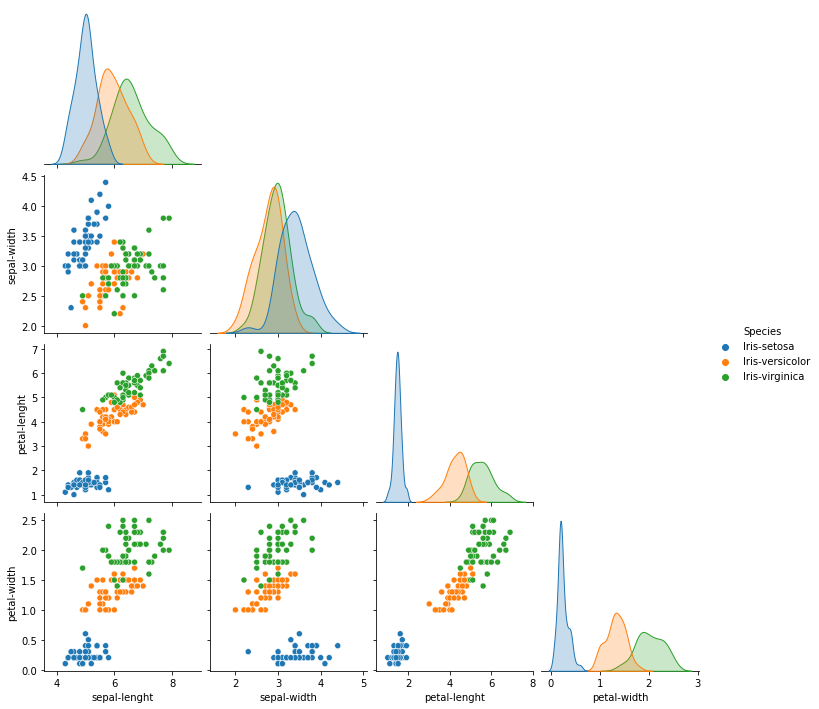

In [ ]:
sb.pairplot(data = iris, hue = 'Species', corner = True)

A partir de la gráfica anterior podemos ver cómo se relacionan las diferentes mediciones de las flores, y vemos cómo cambia el comportamiendo para cada especie. Podemos darnos cuenta que las variables petal-length y petal-width permiten separar muy bien entre los tipos de flor. El grupo de flores setosas se separa facilmente en todos los gráficos de dispersión. En todos los casos se observa sobrelapamiento entre las flores versicolores y virgínicas.

## **3. Partición del dataset en entrenamiento y prueba**

Con el objetivo de crear un modelo capaz de generalizar se procede a dividir los datos en dos subconjuntos. El conjunto de **entrenamiento** y **prueba**.

* El algoritmo aprenderá a partir de los datos de **entrenamiento**.
* Los datos de prueba serán usados para evaluar el desempeño del modelo, ya que son datos desconocidos para el algoritmo.

Usando una función de scikitlearn llamada train_test_split haremos un muestreo aleatorio para crear los dos subconjuntos en una sola linea de código.

En este primer ejercicio vamos crear un modelo de clasificación, el objetivo es predecir la especie a partir de mediciones del pétalo y sépalo . Para lograr esto, le daremos inicialmente al algoritmo información acerca de las medidas de las flores y de la especie a la cual pertenecen, durante el aprendizaje el algoritmo revelerá patrones y tendencias en los datos que le permitan llegar a la etiqueta de salida. Y luego usaremos datos desconocidos para el modelo - datos de prueba - para evaluar el desempeño del modelo.

**Nota:** Tenga presente que este es un ejercicio de aprendizaje supervisado ya que tenemos datos etiquetados, la columna Species es nuestra etiqueta. Al final de este módulo trabajaremos también con problemas de aprendizaje No supervisado.

| Variable | Uso|
| ----------- | ----------- |
| Largo del sépalo | Predictora |
| Ancho del sépalo | Predictora  |
| Largo del petalo | Predictora  |
| Ancho del petalo | Predictora  |
| Especie| Objetivo|

In [ ]:
# Primero dividiremos el conjunto en X - variables predictoras - / y - variable a predecir-

X = iris.iloc[:,0:4] # recuerde que en este caso la columna 4 no está siendo incluida
y = iris.iloc[:,4]

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)


In [ ]:
X = iris.drop(columns = ['Species'])

y = iris['Species']

In [ ]:
X

,sepal-lenght,sepal-width,petal-lenght,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30% 
    random_state = 4 # Estado aleatorio - Semilla - seed, # reproducibilidad
)

In [ ]:
X_train

,sepal-lenght,sepal-width,petal-lenght,petal-width
13,4.3,3.0,1.1,0.1
15,5.7,4.4,1.5,0.4
61,5.9,3.0,4.2,1.5
91,6.1,3.0,4.6,1.4
116,6.5,3.0,5.5,1.8
...,...,...,...,...
50,7.0,3.2,4.7,1.4
87,6.3,2.3,4.4,1.3
104,6.5,3.0,5.8,2.2
129,7.2,3.0,5.8,1.6


In [ ]:
iris.shape

(150, 5)

In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (105, 4)
Dimensiones de y de entrenamiento: (105,)

Dimensiones de X de prueba: (45, 4)
Dimensiones de y de prueba: (45,)


## **4. Modelamiento**

Vamos a crear nuestro primer modelo de clasificación usando  algoritmos de Machine Learning:

1. K-Vecinos más cercanos, conocido por sus siglas en ingles KNN (K-Nearest-Neighbour)
2. Árbol de decisión, conocido por sus siglas en inglés DT (Decision Tree)

### **4.1 K-Vecinos más cercanos**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión

# Creamos un objeto que va a contener toda la información del modelo, en este caso le pasamos el hiperparametro número de vecinos (n_neighbors)
clf = KNeighborsClassifier(n_neighbors = 3)

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
clf.fit(X_train,y_train)

print('Ya hemos entrenado nuestro primer modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos')
print(type(clf))

Ya hemos entrenado nuestro primer modelo con el algoritmo de Machine Learning K-Vecinos más Cercanos
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


#### **4.1.1 Evaluación del desempeño del modelo**

Para evaluar el desempeño del módelo usaremos la exactitud tanto en la partición de entrenamiento como en la de prueba, recuerde que tomamos decisiones usando las métricas sobre la partición de prueba.

Para evaluar el desempeño vamos a comparar las etiquetas reales contra las etiquetas predichas por el modelo. Hagamos primero nuestra primera predicción usando el método predict sobre el objeto clf.

In [ ]:
y_predicted = clf.predict(X_test)
#Note que en este caso solo tengo que pasar a la función un subconjunto de X, el se encargará de generar el y_predict

y_predicted

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [ ]:
# Con el siguiente dataframe puede comparar manualmente los resultados obtenidos

comp = y_test == y_predicted

pd.DataFrame({'Etiqueta real': y_test,'Etiqueta predicha': y_predicted, 'Comparación' : comp })


,Etiqueta real,Etiqueta predicha,Comparación
128,Iris-virginica,Iris-virginica,True
18,Iris-setosa,Iris-setosa,True
130,Iris-virginica,Iris-virginica,True
105,Iris-virginica,Iris-virginica,True
107,Iris-virginica,Iris-virginica,True
78,Iris-versicolor,Iris-versicolor,True
83,Iris-versicolor,Iris-virginica,False
14,Iris-setosa,Iris-setosa,True
5,Iris-setosa,Iris-setosa,True
133,Iris-virginica,Iris-virginica,True


#### **Exactitud - accuracy**

La exactitud se define como:

$$\text{Exactitud} = \frac{\text{número de ejemplos clasificados correctamente}}{\text{ número total de ejemplos}}$$

Toma valores de 0 a y puede ser interpretado como el porcentaje de casos exitosamente clasificados por el modelo, entre mayor sea su valor mejor es el desempeño del modelo. Vamos a calcular la exactitud del modelo con la función accuracy_score que acepta como primer parámetro las etiquetas reales y como segundo parámetro las etiquetas predichas.

In [ ]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, y_predicted)
print('Exactitud en partición de prueba: {:3f}'.format(acc_knn))

y_pred2 = clf.predict(X_train)
acc_knn2 = accuracy_score(y_train, y_pred2)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_knn2))

Exactitud en partición de prueba: 0.977778
Exactitud en partición de entrenamiento: 0.971429


Como puede observar se obtuvo una exactitud del 100% en el conjunto de entrenamiento. ¿Es este un resultado deseado?

Lo invito a que complete la siguiente tabla cambiando el hiperparámetro número de vecinos **n_neighbors** y colocando en la tabla el resultado obtenido. 
¿Se le ocurre alguna manera de hacer este proceso de experimentación más eficiente? 

Discuta los resultados con sus compañeros en el foro.

| Número de vecinos| Exactitud en entrenamiento| Exactitud en prueba|
| ----------- | ----------- | ----------- | 
|1|1.0000|0.9556|
|3|0.980|0.977|
|5|Complete|Complete|
|7|Complete|Complete|
|9|Complete|Complete|
|11|Complete|Complete|
|13|Complete|Complete|

### **4.2 Árbol de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# Note que importamos el clasificador para resolver un problema de clasificación, cabe destacar que también existe su contraparte de regresión

# Creamos un objeto que va a contener toda la información del modelo

tree = DecisionTreeClassifier(max_depth= 8, # Define la profundidad máxima del árbol, cuando igual a None no se limita el crecimiento del arbol
                              random_state= 45, # Define la semilla para las variables aleatorias requeridas dentro del algoritmo
                               max_leaf_nodes = 3# Define el criterio usado para medir la calidad de cada 
                              )

# Usando este objeto vamos a hacer el entrenamiento del modelo, para ello usamos el método fit, este se encarga de ajustar el modelo usando los datos de entrenamiento
tree.fit(X_train,y_train)

print('¡Ya hemos creado nuestro primer modelo usando el algoritmo de Machine Learning árbol de decisión!')
print(type(clf))

¡Ya hemos creado nuestro primer modelo usando el algoritmo de Machine Learning árbol de decisión!
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


#### **4.2.1 Evaluación del desempeño del modelo**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_tree = tree.predict(X_test)
acc_tree_test = accuracy_score(y_test, y_pred_tree)

print('Exactitud en partición de prueba: {:3f}'.format(acc_tree_test))

y_pred_tree_train = tree.predict(X_train)
acc_tree_train = accuracy_score(y_train, y_pred_tree_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_tree_train))

Exactitud en partición de prueba: 0.977778
Exactitud en partición de entrenamiento: 0.952381


A diferencia del modelo de vecinos más cercanos, el árbol de decisión tiene un par de atributos que son muy valiosos, más adelante discutiremos el valor de esta información.

In [ ]:
tree.get_params() # Retorna los hiperparámetros usados para entrenar el modelo

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 45,
 'splitter': 'best'}

In [ ]:
tree.get_depth() # Retorna la profundidad del árbol

2

In [ ]:
tree.feature_importances_ # Retorna la importancia de las variable predictoras en la predicción de la etiqueta Species

array([0.        , 0.        , 0.52337698, 0.47662302])

In [ ]:
nombres_columnas

['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width', 'Species']

Text(0, 0.5, 'Importancia relativa')

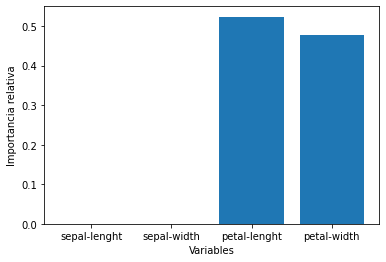

In [ ]:
plt.bar(x= nombres_columnas[0:4] ,height = tree.feature_importances_)
plt.xlabel('Variables')
plt.ylabel('Importancia relativa')

Una de las bondades de los árboles de decisión es la alta interpretabilidad de los resultados. La gráfica del árbol da una gran cantidad de información acerca de la lógica empleada por el modelo para tomar decisiones.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'],feature_names=['sepal-lenght','sepal-width','petal-lenght','petal-width'],impurity=False, filled=True)

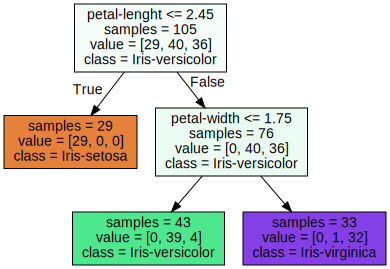

In [ ]:
import graphviz

with open("tree.dot") as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))

Como puede observar se obtuvo una exactitud del 100% en el conjunto de entrenamiento. ¿Es este un resultado deseado?

Lo invito a que complete la siguiente tabla cambiando el hiperparámetro profundidad max_depth y colocando en la tabla el resultado obtenido. EL proceso de limitar el crecimiento de un árbol de decisión se conoce como prepoda.
¿Se le ocurre alguna manera de hacer este proceso de experimentación más eficiente?

Discuta los resultados con sus compañeros en el foro.

| Profundidad máxima| Exactitud en entrenamiento| Exactitud en prueba|
| ----------- | ----------- | ----------- | 
|1|Complete|Complete|
|2|Complete|Complete|
|3|Complete|Complete|
|4|1.000|0.9778|
|5|Complete|Complete|
|6|Complete|Complete|
|7|Complete|Complete|

A partir de los resultados obtenidos, ¿cuál es el mejor modelo? ¿fue entrenado con el algoritmo de KNN o DT?

Discuta los resultados con sus compañeros en el foro.

## Experimentación usando ciclos

In [ ]:
#profundidad = [1,2,3,4,5,6,7,8,9,10]

profundidad = range(1,10)
exactitud_prueba = []
exactitud_entrenamiento = []

for i in profundidad:
  tree = DecisionTreeClassifier(random_state = 0, max_depth = i)
  tree.fit(X_train,y_train)

  y_pred = tree.predict(X_test)
  y_pred2 = tree.predict(X_train)

  metrica = accuracy_score(y_test,y_pred)
  metrica2 = accuracy_score(y_train,y_pred2)

  exactitud_prueba.append(metrica)
  exactitud_entrenamiento.append(metrica2)

print(profundidad)
print(exactitud_prueba)
print(exactitud_entrenamiento)

range(1, 10)
[0.6888888888888889, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
[0.6571428571428571, 0.9523809523809523, 0.9714285714285714, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


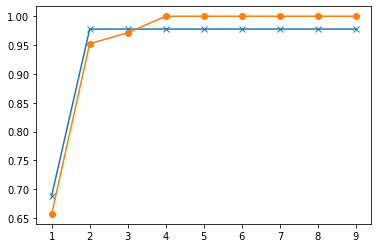

In [ ]:
plt.plot(profundidad,exactitud_prueba, marker = 'x')
plt.plot(profundidad,exactitud_entrenamiento, marker = 'o')

## **Recursos adicionales**


* Documentación K-Vecinos más Cercanos 

https://scikit-learn.org/stable/modules/neighbors.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Documentación árbol de decisión

https://scikit-learn.org/stable/modules/tree.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

* Explicación en video de árbol de decisión, tiene la opción de añadir subitulos en inglés generados automaticamente

https://youtu.be/_L39rN6gz7Y

https://youtu.be/7VeUPuFGJHk
* Recursos visuales para comprender mejor algunos temas
https://mlu-explain.github.io/
https://www.theinsaneapp.com/2021/11/machine-learning-algorithms-for-beginners.html



## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*